[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_10-DeepLearning/blob/master/W10_A_DJ_colab_Deep_Learning_Assignment.ipynb)

# Deep Convolutional Neural Networks 

In this assignment, we will be using the Keras library to build, train, and evaluate some *relatively simple* Convolutional Neural Networks to demonstrate how adding layers to a network can improve accuracy, yet are more computationally expensive. 

The purpose of this assignment is for you to demonstrate understanding of the appropriate structure of a convolutional neural network and to give you an opportunity to research any parameters or elements of CNNs that you don't fully understand.

We will be using the cifar100 dataset for this assignment, however, in order to keep the dataset size small enough to be trained in a reasonable amount of time in a Google Colab, we will only be looking at two classes from the dataset - cats and dogs.

![CNN Structure Diagram](http://www.ryanleeallred.com/wp-content/uploads/2018/06/CNN-diagram.jpeg)


Using TensorFlow backend.


 66658304/170498071 [==========>...................] - ETA: 1:11

170500096/170498071 [==============================] - 114s 1us/step


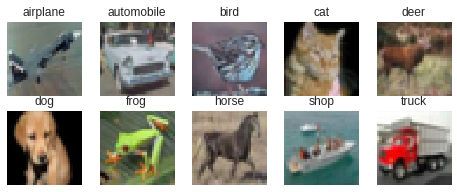

y_train length: 10000
x_train length: 10000
y_test length: 2000
x_test length: 2000


In [1]:
# Import important libraries and methods
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# Important Hyperparameters
batch_size = 32 
num_classes = 2
epochs = 100

# Plot sample image from each cifar10 class.
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','shop','truck']
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

# check for image_data format and format image shape accordingly
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

# Check train and test lengths
print('y_train length:', len(y_train))
print('x_train length:', len(x_train))
print('y_test length:', len(y_test))
print('x_test length:', len(x_test))

# Model #1

This model will be almost as simple as we can make it. It should look something like:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final dropout layer
---
*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)


Then compile the model using categorical_crossentropy as your loss metric. Use the Adam optimizer, and accuracy as your overall scoring metric. 

If you're lost when you get to this point, make sure you look at the lecture colab for somewhat similar sample code.



In [19]:
%%time
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

np.random.seed(42)

CPU times: user 146 ms, sys: 2 ms, total: 148 ms
Wall time: 152 ms


## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

In [20]:
%%time
batch_size1 = 32 
#num_classes = 2
epochs1 = 100
fitted_model1 = model.fit(x_train, y_train, batch_size=batch_size1, epochs=epochs1, validation_data=(x_test, y_test), shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 342us/step - loss: 0.6804 - acc: 0.5607 - val_loss: 0.6621 - val_acc: 0.6155
Epoch 2/100
10000/10000 [==============================] - 3s 318us/step - loss: 0.6449 - acc: 0.6338 - val_loss: 0.6212 - val_acc: 0.6660
Epoch 3/100
10000/10000 [==============================] - 3s 304us/step - loss: 0.6176 - acc: 0.6634 - val_loss: 0.6045 - val_acc: 0.6710
Epoch 4/100
10000/10000 [==============================] - 3s 319us/step - loss: 0.5998 - acc: 0.6742 - val_loss: 0.5903 - val_acc: 0.6765
Epoch 5/100
 5600/10000 [===============>..............] - ETA: 1s - loss: 0.5815 - acc: 0.6943

10000/10000 [==============================] - 3s 315us/step - loss: 0.5838 - acc: 0.6903 - val_loss: 0.5799 - val_acc: 0.6955
Epoch 6/100
10000/10000 [==============================] - 3s 302us/step - loss: 0.5710 - acc: 0.7028 - val_loss: 0.5799 - val_acc: 0.6890
Epoch 7/100
10000/10000 [==============================] - 3s 307us/step - loss: 0.5661 - acc: 0.7020 - val_loss: 0.5753 - val_acc: 0.6960
Epoch 8/100
10000/10000 [==============================] - 3s 303us/step - loss: 0.5539 - acc: 0.7164 - val_loss: 0.5760 - val_acc: 0.7035
Epoch 9/100
10000/10000 [==============================] - 3s 313us/step - loss: 0.5447 - acc: 0.7188 - val_loss: 0.5755 - val_acc: 0.6930
Epoch 10/100
  800/10000 [=>............................] - ETA: 2s - loss: 0.5499 - acc: 0.7113

10000/10000 [==============================] - 3s 302us/step - loss: 0.5357 - acc: 0.7219 - val_loss: 0.5660 - val_acc: 0.7130
Epoch 11/100
10000/10000 [==============================] - 3s 318us/step - loss: 0.5341 - acc: 0.7275 - val_loss: 0.5662 - val_acc: 0.6950
Epoch 12/100
10000/10000 [==============================] - 3s 315us/step - loss: 0.5254 - acc: 0.7312 - val_loss: 0.5580 - val_acc: 0.7140
Epoch 13/100
10000/10000 [==============================] - 3s 308us/step - loss: 0.5205 - acc: 0.7354 - val_loss: 0.5582 - val_acc: 0.7190
Epoch 14/100
 9824/10000 [============================>.] - ETA: 0s - loss: 0.5197 - acc: 0.7334

10000/10000 [==============================] - 3s 311us/step - loss: 0.5201 - acc: 0.7329 - val_loss: 0.5723 - val_acc: 0.6800
Epoch 15/100
10000/10000 [==============================] - 3s 305us/step - loss: 0.5116 - acc: 0.7447 - val_loss: 0.5579 - val_acc: 0.7205
Epoch 16/100
10000/10000 [==============================] - 3s 311us/step - loss: 0.5062 - acc: 0.7421 - val_loss: 0.5607 - val_acc: 0.7135
Epoch 17/100
10000/10000 [==============================] - 3s 312us/step - loss: 0.4957 - acc: 0.7533 - val_loss: 0.5615 - val_acc: 0.7040
Epoch 18/100
10000/10000 [==============================] - 3s 309us/step - loss: 0.5042 - acc: 0.7455 - val_loss: 0.5531 - val_acc: 0.7060
Epoch 19/100
  704/10000 [=>............................] - ETA: 2s - loss: 0.4763 - acc: 0.7685

10000/10000 [==============================] - 3s 318us/step - loss: 0.4913 - acc: 0.7537 - val_loss: 0.5609 - val_acc: 0.7145
Epoch 20/100
10000/10000 [==============================] - 3s 315us/step - loss: 0.4888 - acc: 0.7562 - val_loss: 0.5587 - val_acc: 0.7120
Epoch 21/100
10000/10000 [==============================] - 3s 316us/step - loss: 0.4845 - acc: 0.7606 - val_loss: 0.5606 - val_acc: 0.7140
Epoch 22/100
10000/10000 [==============================] - 3s 312us/step - loss: 0.4744 - acc: 0.7616 - val_loss: 0.5525 - val_acc: 0.7185
Epoch 23/100
 9760/10000 [============================>.] - ETA: 0s - loss: 0.4720 - acc: 0.7653

10000/10000 [==============================] - 3s 317us/step - loss: 0.4706 - acc: 0.7663 - val_loss: 0.5580 - val_acc: 0.7155
Epoch 24/100
10000/10000 [==============================] - 3s 309us/step - loss: 0.4748 - acc: 0.7604 - val_loss: 0.5542 - val_acc: 0.7175
Epoch 25/100
10000/10000 [==============================] - 3s 316us/step - loss: 0.4634 - acc: 0.7748 - val_loss: 0.5659 - val_acc: 0.7225
Epoch 26/100
10000/10000 [==============================] - 3s 318us/step - loss: 0.4622 - acc: 0.7692 - val_loss: 0.5611 - val_acc: 0.7205
Epoch 27/100
10000/10000 [==============================] - 3s 302us/step - loss: 0.4596 - acc: 0.7707 - val_loss: 0.5581 - val_acc: 0.7215
Epoch 28/100
  768/10000 [=>............................] - ETA: 2s - loss: 0.4508 - acc: 0.7943

10000/10000 [==============================] - 3s 317us/step - loss: 0.4597 - acc: 0.7743 - val_loss: 0.5605 - val_acc: 0.7160
Epoch 29/100
10000/10000 [==============================] - 3s 306us/step - loss: 0.4563 - acc: 0.7748 - val_loss: 0.5658 - val_acc: 0.7115
Epoch 30/100
10000/10000 [==============================] - 3s 309us/step - loss: 0.4504 - acc: 0.7751 - val_loss: 0.5578 - val_acc: 0.7180
Epoch 31/100
10000/10000 [==============================] - 3s 316us/step - loss: 0.4517 - acc: 0.7741 - val_loss: 0.5645 - val_acc: 0.7190
Epoch 32/100
10000/10000 [==============================] - 3s 300us/step - loss: 0.4506 - acc: 0.7792 - val_loss: 0.5603 - val_acc: 0.7170


Epoch 33/100
10000/10000 [==============================] - 3s 313us/step - loss: 0.4374 - acc: 0.7896 - val_loss: 0.5636 - val_acc: 0.7205
Epoch 34/100
10000/10000 [==============================] - 3s 301us/step - loss: 0.4393 - acc: 0.7830 - val_loss: 0.5659 - val_acc: 0.7140
Epoch 35/100
10000/10000 [==============================] - 3s 310us/step - loss: 0.4351 - acc: 0.7845 - val_loss: 0.5623 - val_acc: 0.7205
Epoch 36/100
10000/10000 [==============================] - 3s 312us/step - loss: 0.4346 - acc: 0.7927 - val_loss: 0.5708 - val_acc: 0.7185
Epoch 37/100
 8928/10000 [=========================>....] - ETA: 0s - loss: 0.4287 - acc: 0.7912

10000/10000 [==============================] - 3s 304us/step - loss: 0.4294 - acc: 0.7904 - val_loss: 0.5684 - val_acc: 0.7105
Epoch 38/100
10000/10000 [==============================] - 3s 309us/step - loss: 0.4304 - acc: 0.7905 - val_loss: 0.5772 - val_acc: 0.7110
Epoch 39/100
10000/10000 [==============================] - 3s 307us/step - loss: 0.4305 - acc: 0.7859 - val_loss: 0.5750 - val_acc: 0.7195
Epoch 40/100
10000/10000 [==============================] - 3s 308us/step - loss: 0.4234 - acc: 0.7901 - val_loss: 0.5775 - val_acc: 0.7215
Epoch 41/100
10000/10000 [==============================] - 3s 313us/step - loss: 0.4262 - acc: 0.7911 - val_loss: 0.5771 - val_acc: 0.7155
Epoch 42/100
  576/10000 [>.............................] - ETA: 2s - loss: 0.4057 - acc: 0.7882

10000/10000 [==============================] - 3s 303us/step - loss: 0.4222 - acc: 0.7923 - val_loss: 0.5812 - val_acc: 0.7140
Epoch 43/100
10000/10000 [==============================] - 3s 316us/step - loss: 0.4273 - acc: 0.7831 - val_loss: 0.5662 - val_acc: 0.7215
Epoch 44/100
10000/10000 [==============================] - 3s 302us/step - loss: 0.4144 - acc: 0.7998 - val_loss: 0.5695 - val_acc: 0.7175
Epoch 45/100
10000/10000 [==============================] - 3s 316us/step - loss: 0.4169 - acc: 0.7916 - val_loss: 0.5719 - val_acc: 0.7090
Epoch 46/100
 9984/10000 [============================>.] - ETA: 0s - loss: 0.4138 - acc: 0.7996

10000/10000 [==============================] - 3s 317us/step - loss: 0.4140 - acc: 0.7996 - val_loss: 0.6055 - val_acc: 0.7115
Epoch 47/100
10000/10000 [==============================] - 3s 299us/step - loss: 0.4147 - acc: 0.7961 - val_loss: 0.5808 - val_acc: 0.7190
Epoch 48/100
10000/10000 [==============================] - 3s 312us/step - loss: 0.4133 - acc: 0.7982 - val_loss: 0.5745 - val_acc: 0.7150
Epoch 49/100
10000/10000 [==============================] - 3s 299us/step - loss: 0.4161 - acc: 0.7955 - val_loss: 0.5762 - val_acc: 0.7120
Epoch 50/100
10000/10000 [==============================] - 3s 310us/step - loss: 0.4091 - acc: 0.8044 - val_loss: 0.5820 - val_acc: 0.7090
Epoch 51/100
 1024/10000 [==>...........................] - ETA: 2s - loss: 0.3917 - acc: 0.8213

10000/10000 [==============================] - 3s 300us/step - loss: 0.4076 - acc: 0.7985 - val_loss: 0.5959 - val_acc: 0.7140
Epoch 52/100
10000/10000 [==============================] - 3s 305us/step - loss: 0.4028 - acc: 0.8041 - val_loss: 0.5941 - val_acc: 0.7100
Epoch 53/100
10000/10000 [==============================] - 3s 312us/step - loss: 0.4007 - acc: 0.8062 - val_loss: 0.5755 - val_acc: 0.7125
Epoch 54/100
10000/10000 [==============================] - 3s 304us/step - loss: 0.4011 - acc: 0.8042 - val_loss: 0.6028 - val_acc: 0.7130
Epoch 55/100
10000/10000 [==============================] - 3s 309us/step - loss: 0.3994 - acc: 0.8094 - val_loss: 0.5826 - val_acc: 0.7125
Epoch 56/100
   32/10000 [..............................] - ETA: 3s - loss: 0.3931 - acc: 0.8125

10000/10000 [==============================] - 3s 309us/step - loss: 0.4073 - acc: 0.8024 - val_loss: 0.5887 - val_acc: 0.6990
Epoch 57/100
10000/10000 [==============================] - 3s 301us/step - loss: 0.4044 - acc: 0.8041 - val_loss: 0.5819 - val_acc: 0.7060
Epoch 58/100
10000/10000 [==============================] - 3s 307us/step - loss: 0.4007 - acc: 0.8039 - val_loss: 0.5805 - val_acc: 0.7105
Epoch 59/100
10000/10000 [==============================] - 3s 312us/step - loss: 0.3930 - acc: 0.8068 - val_loss: 0.5881 - val_acc: 0.7190
Epoch 60/100
10000/10000 [==============================] - 3s 307us/step - loss: 0.3960 - acc: 0.8077 - val_loss: 0.6013 - val_acc: 0.7185
Epoch 61/100
   32/10000 [..............................] - ETA: 3s - loss: 0.2672 - acc: 0.9688

10000/10000 [==============================] - 3s 308us/step - loss: 0.4007 - acc: 0.8038 - val_loss: 0.5974 - val_acc: 0.7130
Epoch 62/100
10000/10000 [==============================] - 3s 306us/step - loss: 0.3976 - acc: 0.8066 - val_loss: 0.6157 - val_acc: 0.7120
Epoch 63/100
10000/10000 [==============================] - 3s 302us/step - loss: 0.3974 - acc: 0.8057 - val_loss: 0.5884 - val_acc: 0.7165
Epoch 64/100
10000/10000 [==============================] - 3s 307us/step - loss: 0.3877 - acc: 0.8082 - val_loss: 0.5972 - val_acc: 0.7135
Epoch 65/100
10000/10000 [==============================] - 3s 301us/step - loss: 0.3897 - acc: 0.8074 - val_loss: 0.6097 - val_acc: 0.7205
Epoch 66/100
   32/10000 [..............................] - ETA: 3s - loss: 0.2431 - acc: 0.9062

10000/10000 [==============================] - 3s 314us/step - loss: 0.3958 - acc: 0.8098 - val_loss: 0.6086 - val_acc: 0.7120
Epoch 67/100
10000/10000 [==============================] - 3s 309us/step - loss: 0.3894 - acc: 0.8135 - val_loss: 0.6045 - val_acc: 0.7130
Epoch 68/100
10000/10000 [==============================] - 3s 316us/step - loss: 0.3904 - acc: 0.8068 - val_loss: 0.6440 - val_acc: 0.7105
Epoch 69/100
10000/10000 [==============================] - 3s 302us/step - loss: 0.3908 - acc: 0.8063 - val_loss: 0.6139 - val_acc: 0.7170
Epoch 70/100
 9920/10000 [============================>.] - ETA: 0s - loss: 0.3869 - acc: 0.8126

10000/10000 [==============================] - 3s 311us/step - loss: 0.3868 - acc: 0.8123 - val_loss: 0.6234 - val_acc: 0.7130
Epoch 71/100
10000/10000 [==============================] - 3s 301us/step - loss: 0.3912 - acc: 0.8107 - val_loss: 0.6190 - val_acc: 0.7105
Epoch 72/100
10000/10000 [==============================] - 3s 307us/step - loss: 0.3846 - acc: 0.8134 - val_loss: 0.6023 - val_acc: 0.7140
Epoch 73/100
10000/10000 [==============================] - 3s 309us/step - loss: 0.3851 - acc: 0.8111 - val_loss: 0.6000 - val_acc: 0.7170
Epoch 74/100
10000/10000 [==============================] - 3s 302us/step - loss: 0.3855 - acc: 0.8149 - val_loss: 0.6026 - val_acc: 0.7090
Epoch 75/100
  768/10000 [=>............................] - ETA: 2s - loss: 0.4124 - acc: 0.7760

10000/10000 [==============================] - 3s 310us/step - loss: 0.3928 - acc: 0.8074 - val_loss: 0.6063 - val_acc: 0.7055
Epoch 76/100
10000/10000 [==============================] - 3s 311us/step - loss: 0.3889 - acc: 0.8122 - val_loss: 0.5978 - val_acc: 0.7020
Epoch 77/100
10000/10000 [==============================] - 3s 299us/step - loss: 0.3863 - acc: 0.8122 - val_loss: 0.6440 - val_acc: 0.7125
Epoch 78/100
10000/10000 [==============================] - 3s 309us/step - loss: 0.3871 - acc: 0.8115 - val_loss: 0.6192 - val_acc: 0.7190
Epoch 79/100
10000/10000 [==============================] - 3s 299us/step - loss: 0.3861 - acc: 0.8106 - val_loss: 0.6162 - val_acc: 0.7105
Epoch 80/100
   32/10000 [..............................] - ETA: 3s - loss: 0.2432 - acc: 0.9062

10000/10000 [==============================] - 3s 312us/step - loss: 0.3911 - acc: 0.8088 - val_loss: 0.5992 - val_acc: 0.7125
Epoch 81/100
10000/10000 [==============================] - 3s 319us/step - loss: 0.3826 - acc: 0.8111 - val_loss: 0.5861 - val_acc: 0.7125
Epoch 82/100
10000/10000 [==============================] - 3s 304us/step - loss: 0.3835 - acc: 0.8164 - val_loss: 0.6038 - val_acc: 0.7075
Epoch 83/100
10000/10000 [==============================] - 3s 313us/step - loss: 0.3891 - acc: 0.8116 - val_loss: 0.5910 - val_acc: 0.7105
Epoch 84/100
 9888/10000 [============================>.] - ETA: 0s - loss: 0.3817 - acc: 0.8157

10000/10000 [==============================] - 3s 313us/step - loss: 0.3815 - acc: 0.8157 - val_loss: 0.5966 - val_acc: 0.7090
Epoch 85/100
10000/10000 [==============================] - 3s 307us/step - loss: 0.3945 - acc: 0.8083 - val_loss: 0.6151 - val_acc: 0.7135
Epoch 86/100
10000/10000 [==============================] - 3s 319us/step - loss: 0.3715 - acc: 0.8243 - val_loss: 0.6100 - val_acc: 0.7130
Epoch 87/100
10000/10000 [==============================] - 3s 316us/step - loss: 0.3698 - acc: 0.8217 - val_loss: 0.5990 - val_acc: 0.7155
Epoch 88/100
10000/10000 [==============================] - 3s 302us/step - loss: 0.3791 - acc: 0.8119 - val_loss: 0.6089 - val_acc: 0.7090
Epoch 89/100
  576/10000 [>.............................] - ETA: 2s - loss: 0.3640 - acc: 0.8177

10000/10000 [==============================] - 3s 314us/step - loss: 0.3795 - acc: 0.8148 - val_loss: 0.6166 - val_acc: 0.7150
Epoch 90/100
10000/10000 [==============================] - 3s 305us/step - loss: 0.3815 - acc: 0.8142 - val_loss: 0.6140 - val_acc: 0.7145
Epoch 91/100
10000/10000 [==============================] - 3s 308us/step - loss: 0.3745 - acc: 0.8223 - val_loss: 0.5926 - val_acc: 0.7095
Epoch 92/100
10000/10000 [==============================] - 3s 308us/step - loss: 0.3777 - acc: 0.8204 - val_loss: 0.6036 - val_acc: 0.7085
Epoch 93/100
10000/10000 [==============================] - 3s 304us/step - loss: 0.3770 - acc: 0.8183 - val_loss: 0.6105 - val_acc: 0.7110
Epoch 94/100
   32/10000 [..............................] - ETA: 3s - loss: 0.5043 - acc: 0.7500

10000/10000 [==============================] - 3s 313us/step - loss: 0.3764 - acc: 0.8170 - val_loss: 0.6199 - val_acc: 0.7095
Epoch 95/100
10000/10000 [==============================] - 3s 312us/step - loss: 0.3750 - acc: 0.8162 - val_loss: 0.6103 - val_acc: 0.7150
Epoch 96/100
10000/10000 [==============================] - 3s 301us/step - loss: 0.3787 - acc: 0.8181 - val_loss: 0.6057 - val_acc: 0.7120
Epoch 97/100
10000/10000 [==============================] - 3s 311us/step - loss: 0.3729 - acc: 0.8191 - val_loss: 0.5988 - val_acc: 0.7095
Epoch 98/100
10000/10000 [==============================] - 3s 301us/step - loss: 0.3768 - acc: 0.8151 - val_loss: 0.6062 - val_acc: 0.7100


Epoch 99/100
10000/10000 [==============================] - 3s 317us/step - loss: 0.3642 - acc: 0.8236 - val_loss: 0.6045 - val_acc: 0.7085
Epoch 100/100
10000/10000 [==============================] - 3s 311us/step - loss: 0.3701 - acc: 0.8225 - val_loss: 0.6233 - val_acc: 0.7160
CPU times: user 5min 27s, sys: 1min 8s, total: 6min 35s
Wall time: 5min 10s


## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

In [21]:
print(fitted_model1.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


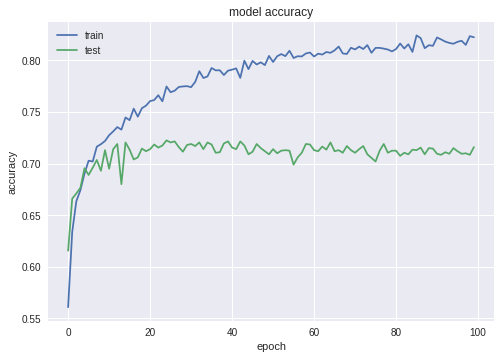

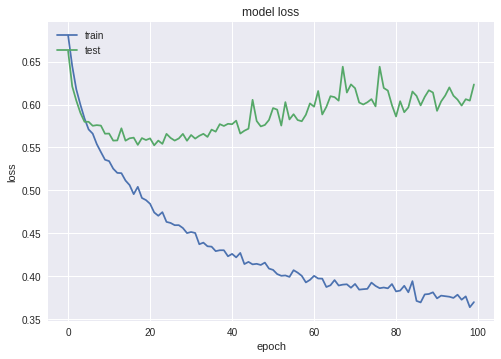

In [22]:
# summarize history for accuracy
plt.plot(fitted_model1.history['acc'])
plt.plot(fitted_model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitted_model1.history['loss'])
plt.plot(fitted_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![something a little deeper](http://www.ryanleeallred.com/wp-content/uploads/2018/06/a-little-deeper.gif)

# Model #2

Lets add an additional set of convolutional->activation->pooling to this model:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)

Again, compile the model using categorical_crossentropy as your loss metric and use the Adam optimizer, and accuracy as your overall scoring metric. 

In [23]:
%%time
model = Sequential()

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

np.random.seed(42)

CPU times: user 197 ms, sys: 0 ns, total: 197 ms
Wall time: 199 ms


## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

In [24]:
%%time
batch_size2 = 32 
#num_classes = 2
epochs2 = 100
fitted_model2 = model.fit(x_train, y_train, batch_size=batch_size2, epochs=epochs2, validation_data=(x_test, y_test), shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 5s 451us/step - loss: 0.6889 - acc: 0.5362 - val_loss: 0.6734 - val_acc: 0.6110
Epoch 2/100
10000/10000 [==============================] - 4s 385us/step - loss: 0.6695 - acc: 0.5958 - val_loss: 0.6572 - val_acc: 0.6280
Epoch 3/100
10000/10000 [==============================] - 4s 385us/step - loss: 0.6531 - acc: 0.6204 - val_loss: 0.6247 - val_acc: 0.6690
Epoch 4/100
10000/10000 [==============================] - 4s 389us/step - loss: 0.6376 - acc: 0.6409 - val_loss: 0.6159 - val_acc: 0.6765
Epoch 5/100
 1120/10000 [==>...........................] - ETA: 3s - loss: 0.6284 - acc: 0.6616

10000/10000 [==============================] - 4s 385us/step - loss: 0.6247 - acc: 0.6516 - val_loss: 0.5964 - val_acc: 0.6865
Epoch 6/100
10000/10000 [==============================] - 4s 382us/step - loss: 0.6172 - acc: 0.6611 - val_loss: 0.5999 - val_acc: 0.6760
Epoch 7/100
10000/10000 [==============================] - 4s 386us/step - loss: 0.6116 - acc: 0.6686 - val_loss: 0.6057 - val_acc: 0.6745
Epoch 8/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.6065 - acc: 0.6765 - val_loss: 0.5784 - val_acc: 0.6880
Epoch 9/100
 5216/10000 [==============>...............] - ETA: 1s - loss: 0.6020 - acc: 0.6706

10000/10000 [==============================] - 4s 385us/step - loss: 0.6006 - acc: 0.6753 - val_loss: 0.5826 - val_acc: 0.6945
Epoch 10/100
10000/10000 [==============================] - 4s 384us/step - loss: 0.5942 - acc: 0.6804 - val_loss: 0.5784 - val_acc: 0.6865
Epoch 11/100
10000/10000 [==============================] - 4s 395us/step - loss: 0.5898 - acc: 0.6848 - val_loss: 0.5633 - val_acc: 0.7010
Epoch 12/100
10000/10000 [==============================] - 4s 392us/step - loss: 0.5859 - acc: 0.6945 - val_loss: 0.5468 - val_acc: 0.7255
Epoch 13/100
 5376/10000 [===============>..............] - ETA: 1s - loss: 0.5691 - acc: 0.6944

10000/10000 [==============================] - 4s 385us/step - loss: 0.5774 - acc: 0.6968 - val_loss: 0.5765 - val_acc: 0.6960
Epoch 14/100
10000/10000 [==============================] - 4s 397us/step - loss: 0.5795 - acc: 0.6945 - val_loss: 0.5491 - val_acc: 0.7150
Epoch 15/100
10000/10000 [==============================] - 4s 397us/step - loss: 0.5711 - acc: 0.7013 - val_loss: 0.5551 - val_acc: 0.7180
Epoch 16/100
10000/10000 [==============================] - 4s 397us/step - loss: 0.5740 - acc: 0.7057 - val_loss: 0.5538 - val_acc: 0.7050
Epoch 17/100
 5088/10000 [==============>...............] - ETA: 1s - loss: 0.5654 - acc: 0.7101

10000/10000 [==============================] - 4s 383us/step - loss: 0.5681 - acc: 0.7061 - val_loss: 0.5419 - val_acc: 0.7240
Epoch 18/100
10000/10000 [==============================] - 4s 389us/step - loss: 0.5638 - acc: 0.7063 - val_loss: 0.5329 - val_acc: 0.7315
Epoch 19/100
10000/10000 [==============================] - 4s 386us/step - loss: 0.5642 - acc: 0.7060 - val_loss: 0.5599 - val_acc: 0.7150
Epoch 20/100
10000/10000 [==============================] - 4s 391us/step - loss: 0.5564 - acc: 0.7181 - val_loss: 0.5248 - val_acc: 0.7365
Epoch 21/100
 5536/10000 [===============>..............] - ETA: 1s - loss: 0.5588 - acc: 0.7153

10000/10000 [==============================] - 4s 382us/step - loss: 0.5561 - acc: 0.7169 - val_loss: 0.5935 - val_acc: 0.6750
Epoch 22/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.5568 - acc: 0.7169 - val_loss: 0.5191 - val_acc: 0.7425
Epoch 23/100
10000/10000 [==============================] - 4s 386us/step - loss: 0.5554 - acc: 0.7191 - val_loss: 0.5086 - val_acc: 0.7520
Epoch 24/100
10000/10000 [==============================] - 4s 379us/step - loss: 0.5495 - acc: 0.7266 - val_loss: 0.5267 - val_acc: 0.7370
Epoch 25/100
 5824/10000 [================>.............] - ETA: 1s - loss: 0.5491 - acc: 0.7193

10000/10000 [==============================] - 4s 389us/step - loss: 0.5516 - acc: 0.7176 - val_loss: 0.5117 - val_acc: 0.7530
Epoch 26/100
10000/10000 [==============================] - 4s 386us/step - loss: 0.5392 - acc: 0.7267 - val_loss: 0.5308 - val_acc: 0.7365
Epoch 27/100
10000/10000 [==============================] - 4s 384us/step - loss: 0.5395 - acc: 0.7309 - val_loss: 0.5394 - val_acc: 0.7270
Epoch 28/100
10000/10000 [==============================] - 4s 389us/step - loss: 0.5447 - acc: 0.7257 - val_loss: 0.5243 - val_acc: 0.7385
Epoch 29/100
 5920/10000 [================>.............] - ETA: 1s - loss: 0.5485 - acc: 0.7211

10000/10000 [==============================] - 4s 386us/step - loss: 0.5421 - acc: 0.7253 - val_loss: 0.5259 - val_acc: 0.7380
Epoch 30/100
10000/10000 [==============================] - 4s 383us/step - loss: 0.5375 - acc: 0.7288 - val_loss: 0.5443 - val_acc: 0.7215
Epoch 31/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.5353 - acc: 0.7352 - val_loss: 0.5095 - val_acc: 0.7510
Epoch 32/100
10000/10000 [==============================] - 4s 385us/step - loss: 0.5302 - acc: 0.7392 - val_loss: 0.5002 - val_acc: 0.7480
Epoch 33/100
 5568/10000 [===============>..............] - ETA: 1s - loss: 0.5288 - acc: 0.7417

10000/10000 [==============================] - 4s 392us/step - loss: 0.5314 - acc: 0.7363 - val_loss: 0.5314 - val_acc: 0.7260
Epoch 34/100
10000/10000 [==============================] - 4s 389us/step - loss: 0.5310 - acc: 0.7400 - val_loss: 0.4889 - val_acc: 0.7665
Epoch 35/100
10000/10000 [==============================] - 4s 379us/step - loss: 0.5370 - acc: 0.7363 - val_loss: 0.5240 - val_acc: 0.7355
Epoch 36/100
10000/10000 [==============================] - 4s 383us/step - loss: 0.5225 - acc: 0.7444 - val_loss: 0.4989 - val_acc: 0.7595
Epoch 37/100
 5600/10000 [===============>..............] - ETA: 1s - loss: 0.5270 - acc: 0.7341

10000/10000 [==============================] - 4s 393us/step - loss: 0.5259 - acc: 0.7363 - val_loss: 0.5306 - val_acc: 0.7245
Epoch 38/100
10000/10000 [==============================] - 4s 378us/step - loss: 0.5226 - acc: 0.7417 - val_loss: 0.4998 - val_acc: 0.7560
Epoch 39/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.5311 - acc: 0.7380 - val_loss: 0.4856 - val_acc: 0.7620
Epoch 40/100
10000/10000 [==============================] - 4s 397us/step - loss: 0.5203 - acc: 0.7442 - val_loss: 0.4980 - val_acc: 0.7540
Epoch 41/100
 5504/10000 [===============>..............] - ETA: 1s - loss: 0.5283 - acc: 0.7411

10000/10000 [==============================] - 4s 392us/step - loss: 0.5272 - acc: 0.7390 - val_loss: 0.4869 - val_acc: 0.7590
Epoch 42/100
10000/10000 [==============================] - 4s 381us/step - loss: 0.5222 - acc: 0.7398 - val_loss: 0.5784 - val_acc: 0.7035
Epoch 43/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.5185 - acc: 0.7452 - val_loss: 0.5261 - val_acc: 0.7405
Epoch 44/100
10000/10000 [==============================] - 4s 385us/step - loss: 0.5212 - acc: 0.7420 - val_loss: 0.5237 - val_acc: 0.7315
Epoch 45/100
 5824/10000 [================>.............] - ETA: 1s - loss: 0.5066 - acc: 0.7509

10000/10000 [==============================] - 4s 387us/step - loss: 0.5193 - acc: 0.7458 - val_loss: 0.4922 - val_acc: 0.7690
Epoch 46/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.5147 - acc: 0.7449 - val_loss: 0.5056 - val_acc: 0.7420
Epoch 47/100
10000/10000 [==============================] - 4s 382us/step - loss: 0.5179 - acc: 0.7454 - val_loss: 0.4970 - val_acc: 0.7475
Epoch 48/100
10000/10000 [==============================] - 4s 391us/step - loss: 0.5086 - acc: 0.7460 - val_loss: 0.4925 - val_acc: 0.7545
Epoch 49/100
 5440/10000 [===============>..............] - ETA: 1s - loss: 0.5193 - acc: 0.7485

10000/10000 [==============================] - 4s 385us/step - loss: 0.5206 - acc: 0.7455 - val_loss: 0.4854 - val_acc: 0.7570
Epoch 50/100
10000/10000 [==============================] - 4s 384us/step - loss: 0.5185 - acc: 0.7400 - val_loss: 0.4990 - val_acc: 0.7425
Epoch 51/100
10000/10000 [==============================] - 4s 377us/step - loss: 0.5066 - acc: 0.7496 - val_loss: 0.4765 - val_acc: 0.7655
Epoch 52/100
10000/10000 [==============================] - 4s 391us/step - loss: 0.5138 - acc: 0.7499 - val_loss: 0.4736 - val_acc: 0.7675
Epoch 53/100
 5504/10000 [===============>..............] - ETA: 1s - loss: 0.5059 - acc: 0.7535

10000/10000 [==============================] - 4s 391us/step - loss: 0.5109 - acc: 0.7516 - val_loss: 0.5437 - val_acc: 0.7225
Epoch 54/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.5048 - acc: 0.7512 - val_loss: 0.4888 - val_acc: 0.7620
Epoch 55/100
10000/10000 [==============================] - 4s 385us/step - loss: 0.5134 - acc: 0.7507 - val_loss: 0.4728 - val_acc: 0.7700
Epoch 56/100
10000/10000 [==============================] - 4s 380us/step - loss: 0.5066 - acc: 0.7516 - val_loss: 0.4896 - val_acc: 0.7495
Epoch 57/100
 5440/10000 [===============>..............] - ETA: 1s - loss: 0.5036 - acc: 0.7467

10000/10000 [==============================] - 4s 389us/step - loss: 0.5112 - acc: 0.7437 - val_loss: 0.4802 - val_acc: 0.7535
Epoch 58/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.5093 - acc: 0.7533 - val_loss: 0.5061 - val_acc: 0.7395
Epoch 59/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.5098 - acc: 0.7535 - val_loss: 0.4777 - val_acc: 0.7660
Epoch 60/100
10000/10000 [==============================] - 4s 384us/step - loss: 0.5057 - acc: 0.7491 - val_loss: 0.5120 - val_acc: 0.7405
Epoch 61/100
 5504/10000 [===============>..............] - ETA: 1s - loss: 0.5079 - acc: 0.7504

10000/10000 [==============================] - 4s 382us/step - loss: 0.5062 - acc: 0.7568 - val_loss: 0.4744 - val_acc: 0.7635
Epoch 62/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.5044 - acc: 0.7489 - val_loss: 0.4680 - val_acc: 0.7655
Epoch 63/100
10000/10000 [==============================] - 4s 381us/step - loss: 0.5026 - acc: 0.7549 - val_loss: 0.4918 - val_acc: 0.7455
Epoch 64/100
10000/10000 [==============================] - 4s 383us/step - loss: 0.5138 - acc: 0.7494 - val_loss: 0.4884 - val_acc: 0.7630
Epoch 65/100
 5792/10000 [================>.............] - ETA: 1s - loss: 0.5034 - acc: 0.7573

10000/10000 [==============================] - 4s 378us/step - loss: 0.5066 - acc: 0.7526 - val_loss: 0.4890 - val_acc: 0.7505
Epoch 66/100
10000/10000 [==============================] - 4s 383us/step - loss: 0.5088 - acc: 0.7506 - val_loss: 0.4695 - val_acc: 0.7680
Epoch 67/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.5042 - acc: 0.7571 - val_loss: 0.4931 - val_acc: 0.7465
Epoch 68/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.5051 - acc: 0.7565 - val_loss: 0.4984 - val_acc: 0.7505
Epoch 69/100
 5728/10000 [================>.............] - ETA: 1s - loss: 0.5046 - acc: 0.7526

10000/10000 [==============================] - 4s 390us/step - loss: 0.4963 - acc: 0.7593 - val_loss: 0.4581 - val_acc: 0.7735
Epoch 70/100
10000/10000 [==============================] - 4s 386us/step - loss: 0.5064 - acc: 0.7559 - val_loss: 0.4868 - val_acc: 0.7585
Epoch 71/100
10000/10000 [==============================] - 4s 384us/step - loss: 0.5040 - acc: 0.7578 - val_loss: 0.4791 - val_acc: 0.7515
Epoch 72/100
10000/10000 [==============================] - 4s 393us/step - loss: 0.5008 - acc: 0.7582 - val_loss: 0.4681 - val_acc: 0.7730
Epoch 73/100
 5312/10000 [==============>...............] - ETA: 1s - loss: 0.4963 - acc: 0.7669

10000/10000 [==============================] - 4s 396us/step - loss: 0.5030 - acc: 0.7591 - val_loss: 0.4659 - val_acc: 0.7665
Epoch 74/100
10000/10000 [==============================] - 4s 394us/step - loss: 0.5032 - acc: 0.7540 - val_loss: 0.4642 - val_acc: 0.7700
Epoch 75/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.5049 - acc: 0.7566 - val_loss: 0.4625 - val_acc: 0.7755
Epoch 76/100
10000/10000 [==============================] - 4s 378us/step - loss: 0.4960 - acc: 0.7575 - val_loss: 0.5109 - val_acc: 0.7420
Epoch 77/100
 5568/10000 [===============>..............] - ETA: 1s - loss: 0.4967 - acc: 0.7592

10000/10000 [==============================] - 4s 383us/step - loss: 0.4983 - acc: 0.7581 - val_loss: 0.4679 - val_acc: 0.7755
Epoch 78/100
10000/10000 [==============================] - 4s 385us/step - loss: 0.5012 - acc: 0.7595 - val_loss: 0.4869 - val_acc: 0.7495
Epoch 79/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.4919 - acc: 0.7612 - val_loss: 0.4561 - val_acc: 0.7745
Epoch 80/100
10000/10000 [==============================] - 4s 384us/step - loss: 0.4995 - acc: 0.7547 - val_loss: 0.5431 - val_acc: 0.7230
Epoch 81/100
 5408/10000 [===============>..............] - ETA: 1s - loss: 0.4919 - acc: 0.7607

10000/10000 [==============================] - 4s 389us/step - loss: 0.4914 - acc: 0.7622 - val_loss: 0.4800 - val_acc: 0.7605
Epoch 82/100
10000/10000 [==============================] - 4s 383us/step - loss: 0.4981 - acc: 0.7564 - val_loss: 0.4784 - val_acc: 0.7610
Epoch 83/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.5003 - acc: 0.7586 - val_loss: 0.4938 - val_acc: 0.7450
Epoch 84/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.4969 - acc: 0.7625 - val_loss: 0.4592 - val_acc: 0.7725
Epoch 85/100
 5536/10000 [===============>..............] - ETA: 1s - loss: 0.5001 - acc: 0.7558

10000/10000 [==============================] - 4s 385us/step - loss: 0.5039 - acc: 0.7523 - val_loss: 0.4882 - val_acc: 0.7525
Epoch 86/100
10000/10000 [==============================] - 4s 396us/step - loss: 0.4929 - acc: 0.7616 - val_loss: 0.4748 - val_acc: 0.7605
Epoch 87/100
10000/10000 [==============================] - 4s 393us/step - loss: 0.5002 - acc: 0.7592 - val_loss: 0.4678 - val_acc: 0.7700
Epoch 88/100
10000/10000 [==============================] - 4s 397us/step - loss: 0.4865 - acc: 0.7640 - val_loss: 0.5161 - val_acc: 0.7400
Epoch 89/100
 5376/10000 [===============>..............] - ETA: 1s - loss: 0.4908 - acc: 0.7610

10000/10000 [==============================] - 4s 382us/step - loss: 0.4908 - acc: 0.7617 - val_loss: 0.4655 - val_acc: 0.7720
Epoch 90/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.4914 - acc: 0.7603 - val_loss: 0.4608 - val_acc: 0.7750
Epoch 91/100
10000/10000 [==============================] - 4s 393us/step - loss: 0.4917 - acc: 0.7636 - val_loss: 0.4654 - val_acc: 0.7755
Epoch 92/100
10000/10000 [==============================] - 4s 382us/step - loss: 0.4965 - acc: 0.7638 - val_loss: 0.4727 - val_acc: 0.7675
Epoch 93/100
 5600/10000 [===============>..............] - ETA: 1s - loss: 0.4933 - acc: 0.7632

10000/10000 [==============================] - 4s 393us/step - loss: 0.4914 - acc: 0.7651 - val_loss: 0.4838 - val_acc: 0.7620
Epoch 94/100
10000/10000 [==============================] - 4s 396us/step - loss: 0.4905 - acc: 0.7638 - val_loss: 0.4608 - val_acc: 0.7730
Epoch 95/100
10000/10000 [==============================] - 4s 389us/step - loss: 0.4929 - acc: 0.7577 - val_loss: 0.4762 - val_acc: 0.7610
Epoch 96/100
10000/10000 [==============================] - 4s 382us/step - loss: 0.4884 - acc: 0.7615 - val_loss: 0.4712 - val_acc: 0.7690
Epoch 97/100
 5792/10000 [================>.............] - ETA: 1s - loss: 0.4857 - acc: 0.7626

10000/10000 [==============================] - 4s 378us/step - loss: 0.4895 - acc: 0.7598 - val_loss: 0.4617 - val_acc: 0.7695
Epoch 98/100
10000/10000 [==============================] - 4s 385us/step - loss: 0.4958 - acc: 0.7599 - val_loss: 0.4530 - val_acc: 0.7770
Epoch 99/100
10000/10000 [==============================] - 4s 393us/step - loss: 0.4968 - acc: 0.7574 - val_loss: 0.4542 - val_acc: 0.7770
Epoch 100/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.4949 - acc: 0.7608 - val_loss: 0.4567 - val_acc: 0.7800
CPU times: user 6min 34s, sys: 1min 22s, total: 7min 56s
Wall time: 6min 28s


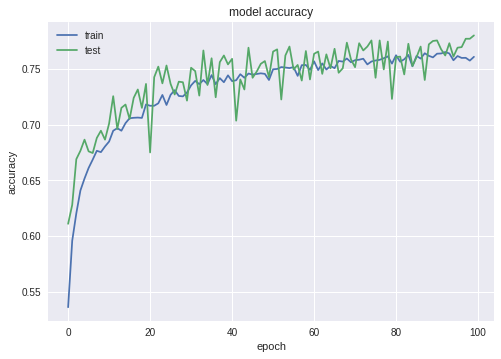

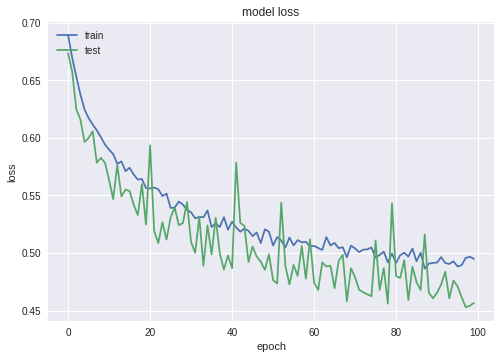

In [25]:
# summarize history for accuracy
plt.plot(fitted_model2.history['acc'])
plt.plot(fitted_model2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitted_model2.history['loss'])
plt.plot(fitted_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

![We Need To Go Deeper](http://www.ryanleeallred.com/wp-content/uploads/2018/06/go-deeper.gif)

# Model #3

Finally, one more set of convolutional/activation/pooling:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---

*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)

Again, compile the model using categorical_crossentropy as your loss metric and use the Adam optimizer, and accuracy as your overall scoring metric. 

In [7]:
%%time
model = Sequential()

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), padding='same',activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # This causes an error ******** added `padding='same' ^^^^
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

np.random.seed(42)

CPU times: user 240 ms, sys: 2 ms, total: 242 ms
Wall time: 246 ms


## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

In [8]:
%%time
batch_size3 = 32 
#num_classes = 2
epochs3 = 100
fitted_model3 = model.fit(x_train, y_train, batch_size=batch_size3, epochs=epochs3, validation_data=(x_test, y_test), shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 6s 558us/step - loss: 0.6942 - acc: 0.4880 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/100
10000/10000 [==============================] - 4s 399us/step - loss: 0.6932 - acc: 0.4957 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/100
10000/10000 [==============================] - 4s 404us/step - loss: 0.6932 - acc: 0.4976 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/100
10000/10000 [==============================] - 4s 406us/step - loss: 0.6932 - acc: 0.4995 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/100
  480/10000 [>.............................] - ETA: 3s - loss: 0.6929 - acc: 0.5229

10000/10000 [==============================] - 4s 401us/step - loss: 0.6933 - acc: 0.4977 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/100
10000/10000 [==============================] - 4s 400us/step - loss: 0.6933 - acc: 0.5004 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/100
10000/10000 [==============================] - 4s 404us/step - loss: 0.6932 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/100
10000/10000 [==============================] - 4s 400us/step - loss: 0.6933 - acc: 0.5004 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 9/100
 4480/10000 [============>.................] - ETA: 2s - loss: 0.6935 - acc: 0.5020

10000/10000 [==============================] - 4s 406us/step - loss: 0.6933 - acc: 0.5028 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 10/100
10000/10000 [==============================] - 4s 397us/step - loss: 0.6933 - acc: 0.4962 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 11/100
10000/10000 [==============================] - 4s 393us/step - loss: 0.6932 - acc: 0.4936 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 12/100
10000/10000 [==============================] - 4s 400us/step - loss: 0.6932 - acc: 0.4989 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 13/100
 5376/10000 [===============>..............] - ETA: 1s - loss: 0.6931 - acc: 0.5126

10000/10000 [==============================] - 4s 396us/step - loss: 0.6930 - acc: 0.5133 - val_loss: 0.6916 - val_acc: 0.5835
Epoch 14/100
10000/10000 [==============================] - 4s 396us/step - loss: 0.6884 - acc: 0.5450 - val_loss: 0.6783 - val_acc: 0.5900
Epoch 15/100
10000/10000 [==============================] - 4s 409us/step - loss: 0.6819 - acc: 0.5687 - val_loss: 0.6659 - val_acc: 0.5965
Epoch 16/100
10000/10000 [==============================] - 4s 401us/step - loss: 0.6715 - acc: 0.5894 - val_loss: 0.6525 - val_acc: 0.6285
Epoch 17/100
 4864/10000 [=============>................] - ETA: 1s - loss: 0.6631 - acc: 0.5970

10000/10000 [==============================] - 4s 391us/step - loss: 0.6624 - acc: 0.6009 - val_loss: 0.6555 - val_acc: 0.6195
Epoch 18/100
10000/10000 [==============================] - 4s 403us/step - loss: 0.6510 - acc: 0.6254 - val_loss: 0.6432 - val_acc: 0.6325
Epoch 19/100
10000/10000 [==============================] - 4s 403us/step - loss: 0.6452 - acc: 0.6262 - val_loss: 0.6439 - val_acc: 0.6315
Epoch 20/100
10000/10000 [==============================] - 4s 397us/step - loss: 0.6429 - acc: 0.6314 - val_loss: 0.6218 - val_acc: 0.6580
Epoch 21/100
 5056/10000 [==============>...............] - ETA: 1s - loss: 0.6385 - acc: 0.6394

10000/10000 [==============================] - 4s 394us/step - loss: 0.6352 - acc: 0.6422 - val_loss: 0.6185 - val_acc: 0.6590
Epoch 22/100
10000/10000 [==============================] - 4s 401us/step - loss: 0.6331 - acc: 0.6389 - val_loss: 0.6109 - val_acc: 0.6705
Epoch 23/100
10000/10000 [==============================] - 4s 396us/step - loss: 0.6278 - acc: 0.6536 - val_loss: 0.6016 - val_acc: 0.6905
Epoch 24/100
10000/10000 [==============================] - 4s 389us/step - loss: 0.6181 - acc: 0.6625 - val_loss: 0.6020 - val_acc: 0.6750
Epoch 25/100
 5056/10000 [==============>...............] - ETA: 1s - loss: 0.6130 - acc: 0.6663

10000/10000 [==============================] - 4s 397us/step - loss: 0.6169 - acc: 0.6590 - val_loss: 0.5903 - val_acc: 0.6830
Epoch 26/100
10000/10000 [==============================] - 4s 392us/step - loss: 0.6136 - acc: 0.6674 - val_loss: 0.5841 - val_acc: 0.6940
Epoch 27/100
10000/10000 [==============================] - 4s 393us/step - loss: 0.6123 - acc: 0.6605 - val_loss: 0.5906 - val_acc: 0.6815
Epoch 28/100
10000/10000 [==============================] - 4s 392us/step - loss: 0.6047 - acc: 0.6722 - val_loss: 0.5753 - val_acc: 0.7005
Epoch 29/100
 5376/10000 [===============>..............] - ETA: 1s - loss: 0.6033 - acc: 0.6834

10000/10000 [==============================] - 4s 391us/step - loss: 0.6060 - acc: 0.6779 - val_loss: 0.5883 - val_acc: 0.6860
Epoch 30/100
10000/10000 [==============================] - 4s 397us/step - loss: 0.5996 - acc: 0.6770 - val_loss: 0.6094 - val_acc: 0.6565
Epoch 31/100
10000/10000 [==============================] - 4s 398us/step - loss: 0.5979 - acc: 0.6790 - val_loss: 0.5950 - val_acc: 0.6725
Epoch 32/100
10000/10000 [==============================] - 4s 396us/step - loss: 0.5990 - acc: 0.6771 - val_loss: 0.5702 - val_acc: 0.7055
Epoch 33/100
 5120/10000 [==============>...............] - ETA: 1s - loss: 0.5940 - acc: 0.6898

10000/10000 [==============================] - 4s 395us/step - loss: 0.5940 - acc: 0.6858 - val_loss: 0.5796 - val_acc: 0.6910
Epoch 34/100
10000/10000 [==============================] - 4s 396us/step - loss: 0.5885 - acc: 0.6910 - val_loss: 0.5641 - val_acc: 0.7065
Epoch 35/100
10000/10000 [==============================] - 4s 402us/step - loss: 0.5894 - acc: 0.6836 - val_loss: 0.5655 - val_acc: 0.7180
Epoch 36/100
10000/10000 [==============================] - 4s 401us/step - loss: 0.5929 - acc: 0.6821 - val_loss: 0.5588 - val_acc: 0.7145
Epoch 37/100
 4768/10000 [=============>................] - ETA: 1s - loss: 0.5858 - acc: 0.6837

10000/10000 [==============================] - 4s 396us/step - loss: 0.5881 - acc: 0.6871 - val_loss: 0.5653 - val_acc: 0.7090
Epoch 38/100
10000/10000 [==============================] - 4s 400us/step - loss: 0.5828 - acc: 0.6922 - val_loss: 0.5667 - val_acc: 0.6985
Epoch 39/100
10000/10000 [==============================] - 4s 389us/step - loss: 0.5800 - acc: 0.6967 - val_loss: 0.5513 - val_acc: 0.7175
Epoch 40/100
10000/10000 [==============================] - 4s 392us/step - loss: 0.5759 - acc: 0.7056 - val_loss: 0.5403 - val_acc: 0.7340
Epoch 41/100
 5344/10000 [===============>..............] - ETA: 1s - loss: 0.5753 - acc: 0.7036

10000/10000 [==============================] - 4s 394us/step - loss: 0.5787 - acc: 0.7010 - val_loss: 0.5380 - val_acc: 0.7365
Epoch 42/100
10000/10000 [==============================] - 4s 391us/step - loss: 0.5747 - acc: 0.6995 - val_loss: 0.5833 - val_acc: 0.6780
Epoch 43/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.5811 - acc: 0.6917 - val_loss: 0.5762 - val_acc: 0.6900
Epoch 44/100
10000/10000 [==============================] - 4s 400us/step - loss: 0.5780 - acc: 0.7063 - val_loss: 0.5621 - val_acc: 0.7030
Epoch 45/100
 5440/10000 [===============>..............] - ETA: 1s - loss: 0.5725 - acc: 0.7031

10000/10000 [==============================] - 4s 397us/step - loss: 0.5736 - acc: 0.7036 - val_loss: 0.5317 - val_acc: 0.7425
Epoch 46/100
10000/10000 [==============================] - 4s 394us/step - loss: 0.5742 - acc: 0.6993 - val_loss: 0.5443 - val_acc: 0.7195
Epoch 47/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.5638 - acc: 0.7071 - val_loss: 0.5666 - val_acc: 0.6940
Epoch 48/100
10000/10000 [==============================] - 4s 393us/step - loss: 0.5684 - acc: 0.7061 - val_loss: 0.5487 - val_acc: 0.7160
Epoch 49/100
 5440/10000 [===============>..............] - ETA: 1s - loss: 0.5676 - acc: 0.7090

10000/10000 [==============================] - 4s 391us/step - loss: 0.5655 - acc: 0.7069 - val_loss: 0.5287 - val_acc: 0.7435
Epoch 50/100
10000/10000 [==============================] - 4s 384us/step - loss: 0.5699 - acc: 0.7034 - val_loss: 0.5459 - val_acc: 0.7200
Epoch 51/100
10000/10000 [==============================] - 4s 394us/step - loss: 0.5682 - acc: 0.7105 - val_loss: 0.5302 - val_acc: 0.7420
Epoch 52/100
10000/10000 [==============================] - 4s 393us/step - loss: 0.5575 - acc: 0.7116 - val_loss: 0.5209 - val_acc: 0.7465
Epoch 53/100
 5472/10000 [===============>..............] - ETA: 1s - loss: 0.5533 - acc: 0.7273

10000/10000 [==============================] - 4s 399us/step - loss: 0.5588 - acc: 0.7197 - val_loss: 0.5675 - val_acc: 0.6990
Epoch 54/100
10000/10000 [==============================] - 4s 395us/step - loss: 0.5599 - acc: 0.7103 - val_loss: 0.5263 - val_acc: 0.7375
Epoch 55/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.5570 - acc: 0.7162 - val_loss: 0.5189 - val_acc: 0.7485
Epoch 56/100
10000/10000 [==============================] - 4s 379us/step - loss: 0.5599 - acc: 0.7151 - val_loss: 0.5409 - val_acc: 0.7190
Epoch 57/100
 5504/10000 [===============>..............] - ETA: 1s - loss: 0.5638 - acc: 0.7157

10000/10000 [==============================] - 4s 393us/step - loss: 0.5588 - acc: 0.7165 - val_loss: 0.5500 - val_acc: 0.7110
Epoch 58/100
10000/10000 [==============================] - 4s 384us/step - loss: 0.5601 - acc: 0.7139 - val_loss: 0.5158 - val_acc: 0.7465
Epoch 59/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.5579 - acc: 0.7170 - val_loss: 0.5205 - val_acc: 0.7425
Epoch 60/100
10000/10000 [==============================] - 4s 381us/step - loss: 0.5584 - acc: 0.7156 - val_loss: 0.5297 - val_acc: 0.7345
Epoch 61/100
 5856/10000 [================>.............] - ETA: 1s - loss: 0.5576 - acc: 0.7153

10000/10000 [==============================] - 4s 393us/step - loss: 0.5563 - acc: 0.7160 - val_loss: 0.5384 - val_acc: 0.7190
Epoch 62/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.5509 - acc: 0.7200 - val_loss: 0.5110 - val_acc: 0.7545
Epoch 63/100
10000/10000 [==============================] - 4s 392us/step - loss: 0.5568 - acc: 0.7148 - val_loss: 0.5410 - val_acc: 0.7205
Epoch 64/100
10000/10000 [==============================] - 4s 400us/step - loss: 0.5524 - acc: 0.7215 - val_loss: 0.5165 - val_acc: 0.7420
Epoch 65/100
 5248/10000 [==============>...............] - ETA: 1s - loss: 0.5546 - acc: 0.7205

10000/10000 [==============================] - 4s 398us/step - loss: 0.5528 - acc: 0.7182 - val_loss: 0.5286 - val_acc: 0.7270
Epoch 66/100
10000/10000 [==============================] - 4s 400us/step - loss: 0.5466 - acc: 0.7235 - val_loss: 0.5307 - val_acc: 0.7245
Epoch 67/100
10000/10000 [==============================] - 4s 392us/step - loss: 0.5468 - acc: 0.7230 - val_loss: 0.5499 - val_acc: 0.7050
Epoch 68/100
10000/10000 [==============================] - 4s 403us/step - loss: 0.5404 - acc: 0.7323 - val_loss: 0.5080 - val_acc: 0.7590
Epoch 69/100
 5472/10000 [===============>..............] - ETA: 1s - loss: 0.5588 - acc: 0.7151

10000/10000 [==============================] - 4s 381us/step - loss: 0.5481 - acc: 0.7213 - val_loss: 0.5045 - val_acc: 0.7600
Epoch 70/100
10000/10000 [==============================] - 4s 380us/step - loss: 0.5458 - acc: 0.7263 - val_loss: 0.5266 - val_acc: 0.7315
Epoch 71/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.5453 - acc: 0.7216 - val_loss: 0.5171 - val_acc: 0.7330
Epoch 72/100
10000/10000 [==============================] - 4s 385us/step - loss: 0.5434 - acc: 0.7281 - val_loss: 0.5041 - val_acc: 0.7580
Epoch 73/100
 5984/10000 [================>.............] - ETA: 1s - loss: 0.5376 - acc: 0.7331

10000/10000 [==============================] - 4s 383us/step - loss: 0.5381 - acc: 0.7324 - val_loss: 0.5042 - val_acc: 0.7460
Epoch 74/100
10000/10000 [==============================] - 4s 385us/step - loss: 0.5443 - acc: 0.7256 - val_loss: 0.5312 - val_acc: 0.7240
Epoch 75/100
10000/10000 [==============================] - 4s 373us/step - loss: 0.5386 - acc: 0.7290 - val_loss: 0.5145 - val_acc: 0.7410
Epoch 76/100
10000/10000 [==============================] - 4s 367us/step - loss: 0.5447 - acc: 0.7262 - val_loss: 0.5267 - val_acc: 0.7295
Epoch 77/100
 6560/10000 [==================>...........] - ETA: 1s - loss: 0.5427 - acc: 0.7264

10000/10000 [==============================] - 4s 369us/step - loss: 0.5425 - acc: 0.7265 - val_loss: 0.5190 - val_acc: 0.7310
Epoch 78/100
10000/10000 [==============================] - 4s 374us/step - loss: 0.5382 - acc: 0.7308 - val_loss: 0.5474 - val_acc: 0.7105
Epoch 79/100
10000/10000 [==============================] - 4s 375us/step - loss: 0.5378 - acc: 0.7329 - val_loss: 0.5044 - val_acc: 0.7655
Epoch 80/100
10000/10000 [==============================] - 4s 388us/step - loss: 0.5403 - acc: 0.7312 - val_loss: 0.5195 - val_acc: 0.7410
Epoch 81/100
 5984/10000 [================>.............] - ETA: 1s - loss: 0.5378 - acc: 0.7346

10000/10000 [==============================] - 4s 385us/step - loss: 0.5361 - acc: 0.7321 - val_loss: 0.5207 - val_acc: 0.7375
Epoch 82/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.5377 - acc: 0.7322 - val_loss: 0.5227 - val_acc: 0.7350
Epoch 83/100
10000/10000 [==============================] - 4s 390us/step - loss: 0.5361 - acc: 0.7333 - val_loss: 0.5046 - val_acc: 0.7490
Epoch 84/100
10000/10000 [==============================] - 4s 393us/step - loss: 0.5393 - acc: 0.7262 - val_loss: 0.5027 - val_acc: 0.7535
Epoch 85/100
 5856/10000 [================>.............] - ETA: 1s - loss: 0.5374 - acc: 0.7331

10000/10000 [==============================] - 4s 377us/step - loss: 0.5418 - acc: 0.7291 - val_loss: 0.5075 - val_acc: 0.7450
Epoch 86/100
10000/10000 [==============================] - 4s 380us/step - loss: 0.5349 - acc: 0.7302 - val_loss: 0.5036 - val_acc: 0.7495
Epoch 87/100
10000/10000 [==============================] - 4s 378us/step - loss: 0.5287 - acc: 0.7402 - val_loss: 0.5112 - val_acc: 0.7490
Epoch 88/100
10000/10000 [==============================] - 4s 384us/step - loss: 0.5321 - acc: 0.7413 - val_loss: 0.5189 - val_acc: 0.7385
Epoch 89/100
 6016/10000 [=================>............] - ETA: 1s - loss: 0.5381 - acc: 0.7354

10000/10000 [==============================] - 4s 389us/step - loss: 0.5363 - acc: 0.7373 - val_loss: 0.5027 - val_acc: 0.7550
Epoch 90/100
10000/10000 [==============================] - 4s 383us/step - loss: 0.5358 - acc: 0.7339 - val_loss: 0.5089 - val_acc: 0.7410
Epoch 91/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.5302 - acc: 0.7375 - val_loss: 0.5118 - val_acc: 0.7460
Epoch 92/100
10000/10000 [==============================] - 4s 387us/step - loss: 0.5290 - acc: 0.7420 - val_loss: 0.5332 - val_acc: 0.7235
Epoch 93/100
 5504/10000 [===============>..............] - ETA: 1s - loss: 0.5308 - acc: 0.7333

10000/10000 [==============================] - 4s 374us/step - loss: 0.5261 - acc: 0.7410 - val_loss: 0.5180 - val_acc: 0.7375
Epoch 94/100
10000/10000 [==============================] - 4s 368us/step - loss: 0.5266 - acc: 0.7395 - val_loss: 0.4875 - val_acc: 0.7770
Epoch 95/100
10000/10000 [==============================] - 4s 377us/step - loss: 0.5332 - acc: 0.7307 - val_loss: 0.5095 - val_acc: 0.7490
Epoch 96/100
10000/10000 [==============================] - 4s 386us/step - loss: 0.5299 - acc: 0.7408 - val_loss: 0.5503 - val_acc: 0.7080
Epoch 97/100
 6080/10000 [=================>............] - ETA: 1s - loss: 0.5283 - acc: 0.7410

10000/10000 [==============================] - 4s 386us/step - loss: 0.5310 - acc: 0.7371 - val_loss: 0.5096 - val_acc: 0.7510
Epoch 98/100
10000/10000 [==============================] - 4s 381us/step - loss: 0.5257 - acc: 0.7394 - val_loss: 0.4962 - val_acc: 0.7595
Epoch 99/100
10000/10000 [==============================] - 4s 383us/step - loss: 0.5237 - acc: 0.7395 - val_loss: 0.5070 - val_acc: 0.7435
Epoch 100/100
10000/10000 [==============================] - 4s 379us/step - loss: 0.5221 - acc: 0.7412 - val_loss: 0.5105 - val_acc: 0.7385
CPU times: user 6min 22s, sys: 1min 26s, total: 7min 49s
Wall time: 6min 33s


## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

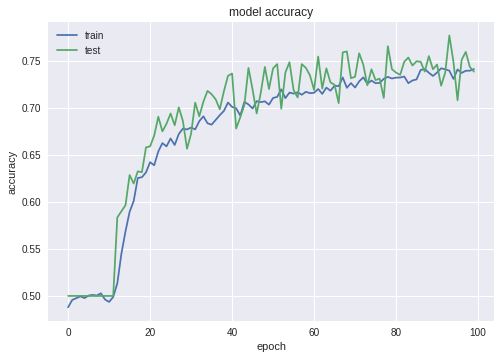

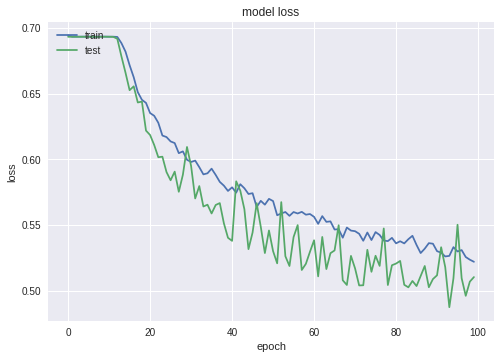

In [9]:
# summarize history for accuracy
plt.plot(fitted_model3.history['acc'])
plt.plot(fitted_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitted_model3.history['loss'])
plt.plot(fitted_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Stretch Goal:

## Use other classes from Cifar10
Try using different classes from the Cifar10 dataset or use all 10. You might need to sample the training data or limit the number of epochs if you decide to use the entire dataset due to processing constraints.

## Hyperparameter Tune Your Model
If you have successfully complete shown how increasing the depth of a neural network can improve its accuracy, and you feel like you have a solid understanding of all of the different parts of CNNs, try hyperparameter tuning your strongest model to see how much additional accuracy you can squeeze out of it. This will also give you a chance to research the different hyperparameters as well as their significance/purpose. (There are lots and lots)

---

Here's a helpful article that will show you how to get started using GridSearch to hyperaparameter tune your CNN. (should you desire to use that method):

[Grid Search Hyperparameters for Deep Learning Models in Python With Keras](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)

In [30]:
%%time
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 


CPU times: user 94 ms, sys: 150 ms, total: 244 ms
Wall time: 251 ms


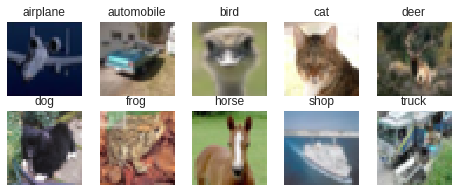

CPU times: user 563 ms, sys: 117 ms, total: 680 ms
Wall time: 549 ms


In [31]:
%%time
# Important Hyperparameters
batch_size = 32 
num_classes = 2
epochs = 100

# Plot sample image from each cifar10 class.
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','shop','truck']
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


In [34]:
# check for image_data format and format image shape accordingly
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


num_classes10 = 10

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes10)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes10)

# Check train and test lengths
print('y_train length:', len(y_train))
print('x_train length:', len(x_train))
print('y_test length:', len(y_test))
print('x_test length:', len(x_test))

y_train length: 50000
x_train length: 50000
y_test length: 10000
x_test length: 10000


In [35]:
print(num_classes)
print(num_classes10)

2
10


In [49]:
%%time
model = Sequential()

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2))) # This causes an error ********
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=['accuracy'])

np.random.seed(42)

CPU times: user 493 ms, sys: 0 ns, total: 493 ms
Wall time: 494 ms


In [52]:
%%time
batch_size10 = 32 
num_classes10 = 10
epochs10 = 100
fitted_model10 = model.fit(x_train, y_train, batch_size=batch_size10, epochs=epochs10, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 433us/step - loss: 2.3028 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/100
20032/50000 [===========>..................] - ETA: 12s - loss: 2.3028 - acc: 0.0978

50000/50000 [==============================] - 22s 441us/step - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 3/100
46496/50000 [==========================>...] - ETA: 1s - loss: 2.3028 - acc: 0.0983

50000/50000 [==============================] - 22s 440us/step - loss: 2.3028 - acc: 0.0989 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/100
 4160/50000 [=>............................] - ETA: 19s - loss: 2.3027 - acc: 0.0954

50000/50000 [==============================] - 22s 437us/step - loss: 2.3028 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/100
40480/50000 [=======================>......] - ETA: 4s - loss: 2.3028 - acc: 0.0982

50000/50000 [==============================] - 22s 443us/step - loss: 2.3028 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0975 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/100
 2464/50000 [>.............................] - ETA: 20s - loss: 2.3029 - acc: 0.0913

50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0960 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 9/100
39872/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0982

50000/50000 [==============================] - 22s 443us/step - loss: 2.3028 - acc: 0.0982 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 10/100
50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 11/100
 1952/50000 [>.............................] - ETA: 20s - loss: 2.3025 - acc: 0.1035

50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 12/100
39968/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0988

50000/50000 [==============================] - 22s 435us/step - loss: 2.3028 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 13/100
50000/50000 [==============================] - 22s 441us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 14/100
 1984/50000 [>.............................] - ETA: 20s - loss: 2.3021 - acc: 0.1074

50000/50000 [==============================] - 22s 440us/step - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 15/100
39808/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0985

50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 16/100
50000/50000 [==============================] - 22s 440us/step - loss: 2.3028 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 17/100
 1952/50000 [>.............................] - ETA: 20s - loss: 2.3029 - acc: 0.0881

50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 18/100
39264/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0988

50000/50000 [==============================] - 22s 444us/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 19/100
50000/50000 [==============================] - 22s 440us/step - loss: 2.3028 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 20/100
 2048/50000 [>.............................] - ETA: 19s - loss: 2.3025 - acc: 0.1050

50000/50000 [==============================] - 22s 436us/step - loss: 2.3028 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 21/100
39680/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0978

50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 22/100
50000/50000 [==============================] - 22s 443us/step - loss: 2.3028 - acc: 0.0995 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 23/100
 1824/50000 [>.............................] - ETA: 20s - loss: 2.3025 - acc: 0.1003

50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0964 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 24/100
39936/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0981

50000/50000 [==============================] - 22s 434us/step - loss: 2.3028 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 25/100
50000/50000 [==============================] - 22s 440us/step - loss: 2.3027 - acc: 0.0995 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 26/100
 2080/50000 [>.............................] - ETA: 20s - loss: 2.3028 - acc: 0.0923

50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 27/100
39424/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0986

50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 28/100
50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0999 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 29/100
 2080/50000 [>.............................] - ETA: 20s - loss: 2.3025 - acc: 0.1062

50000/50000 [==============================] - 22s 441us/step - loss: 2.3028 - acc: 0.1007 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 30/100
39136/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0989

50000/50000 [==============================] - 22s 443us/step - loss: 2.3028 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 31/100
50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0993 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 32/100
 1824/50000 [>.............................] - ETA: 20s - loss: 2.3021 - acc: 0.1086

50000/50000 [==============================] - 22s 443us/step - loss: 2.3028 - acc: 0.0976 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 33/100
39424/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0984

50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 34/100
50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 35/100
 1984/50000 [>.............................] - ETA: 19s - loss: 2.3030 - acc: 0.0978

50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0998 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 36/100
39936/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0968

50000/50000 [==============================] - 22s 437us/step - loss: 2.3028 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 37/100
50000/50000 [==============================] - 22s 437us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 38/100
 2464/50000 [>.............................] - ETA: 19s - loss: 2.3028 - acc: 0.0917

50000/50000 [==============================] - 22s 437us/step - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 39/100
40288/50000 [=======================>......] - ETA: 4s - loss: 2.3028 - acc: 0.0984

50000/50000 [==============================] - 22s 436us/step - loss: 2.3028 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 40/100
50000/50000 [==============================] - 22s 436us/step - loss: 2.3028 - acc: 0.0956 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 41/100
 2496/50000 [>.............................] - ETA: 20s - loss: 2.3028 - acc: 0.0986

50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 42/100
39520/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0969

50000/50000 [==============================] - 22s 441us/step - loss: 2.3028 - acc: 0.0962 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 43/100
50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0960 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 44/100
 1728/50000 [>.............................] - ETA: 20s - loss: 2.3031 - acc: 0.1019

50000/50000 [==============================] - 22s 440us/step - loss: 2.3028 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 45/100
39104/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0981

50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0977 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 46/100
50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.1007 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 47/100
 1728/50000 [>.............................] - ETA: 19s - loss: 2.3027 - acc: 0.0978

50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 48/100
39392/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0978

50000/50000 [==============================] - 22s 437us/step - loss: 2.3028 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 49/100
50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 50/100
 2144/50000 [>.............................] - ETA: 19s - loss: 2.3025 - acc: 0.0970

50000/50000 [==============================] - 22s 438us/step - loss: 2.3027 - acc: 0.0985 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 51/100
39488/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0999

50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 22s 435us/step - loss: 2.3028 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 53/100
 2464/50000 [>.............................] - ETA: 19s - loss: 2.3023 - acc: 0.0998

50000/50000 [==============================] - 22s 439us/step - loss: 2.3027 - acc: 0.1003 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 54/100
39712/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0979

50000/50000 [==============================] - 22s 443us/step - loss: 2.3028 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0997 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 56/100
 1952/50000 [>.............................] - ETA: 20s - loss: 2.3029 - acc: 0.0973

50000/50000 [==============================] - 22s 441us/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 57/100
39520/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0965

50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 58/100
50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 59/100
 2176/50000 [>.............................] - ETA: 19s - loss: 2.3027 - acc: 0.0947

50000/50000 [==============================] - 22s 435us/step - loss: 2.3028 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 60/100
39584/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0990

50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0996 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 62/100
 1728/50000 [>.............................] - ETA: 20s - loss: 2.3028 - acc: 0.0961

50000/50000 [==============================] - 22s 443us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 63/100
40128/50000 [=======================>......] - ETA: 4s - loss: 2.3028 - acc: 0.0959

50000/50000 [==============================] - 22s 433us/step - loss: 2.3028 - acc: 0.0955 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 22s 436us/step - loss: 2.3028 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 65/100
 2368/50000 [>.............................] - ETA: 19s - loss: 2.3024 - acc: 0.1018

50000/50000 [==============================] - 22s 437us/step - loss: 2.3028 - acc: 0.0991 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 66/100
40384/50000 [=======================>......] - ETA: 3s - loss: 2.3028 - acc: 0.0985

50000/50000 [==============================] - 22s 434us/step - loss: 2.3028 - acc: 0.0987 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 67/100
50000/50000 [==============================] - 22s 436us/step - loss: 2.3028 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 68/100
 2336/50000 [>.............................] - ETA: 19s - loss: 2.3023 - acc: 0.1104

50000/50000 [==============================] - 22s 433us/step - loss: 2.3028 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 69/100
40384/50000 [=======================>......] - ETA: 3s - loss: 2.3027 - acc: 0.1002

50000/50000 [==============================] - 22s 434us/step - loss: 2.3027 - acc: 0.0999 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 70/100
50000/50000 [==============================] - 22s 436us/step - loss: 2.3028 - acc: 0.0991 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 71/100
 2624/50000 [>.............................] - ETA: 20s - loss: 2.3029 - acc: 0.0979

50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 72/100
40928/50000 [=======================>......] - ETA: 3s - loss: 2.3027 - acc: 0.1006

50000/50000 [==============================] - 22s 433us/step - loss: 2.3028 - acc: 0.0999 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 73/100
50000/50000 [==============================] - 22s 434us/step - loss: 2.3028 - acc: 0.1002 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 74/100
 2656/50000 [>.............................] - ETA: 19s - loss: 2.3029 - acc: 0.0960

50000/50000 [==============================] - 21s 428us/step - loss: 2.3028 - acc: 0.0989 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 75/100
41024/50000 [=======================>......] - ETA: 3s - loss: 2.3028 - acc: 0.0986

50000/50000 [==============================] - 21s 430us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 76/100
50000/50000 [==============================] - 21s 430us/step - loss: 2.3028 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 77/100
 3168/50000 [>.............................] - ETA: 18s - loss: 2.3023 - acc: 0.1032

50000/50000 [==============================] - 21s 428us/step - loss: 2.3028 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 78/100
40992/50000 [=======================>......] - ETA: 3s - loss: 2.3028 - acc: 0.0994

50000/50000 [==============================] - 22s 433us/step - loss: 2.3028 - acc: 0.0988 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 79/100
50000/50000 [==============================] - 22s 430us/step - loss: 2.3028 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 80/100
 3136/50000 [>.............................] - ETA: 19s - loss: 2.3026 - acc: 0.0953

50000/50000 [==============================] - 22s 432us/step - loss: 2.3028 - acc: 0.0969 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 81/100
40000/50000 [=======================>......] - ETA: 4s - loss: 2.3028 - acc: 0.1000

50000/50000 [==============================] - 22s 440us/step - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 82/100
50000/50000 [==============================] - 21s 427us/step - loss: 2.3028 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 83/100
 3424/50000 [=>............................] - ETA: 19s - loss: 2.3026 - acc: 0.1002

50000/50000 [==============================] - 21s 429us/step - loss: 2.3028 - acc: 0.0990 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 84/100
41312/50000 [=======================>......] - ETA: 3s - loss: 2.3028 - acc: 0.0986

50000/50000 [==============================] - 22s 433us/step - loss: 2.3028 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 85/100
50000/50000 [==============================] - 22s 431us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 86/100
 3264/50000 [>.............................] - ETA: 19s - loss: 2.3028 - acc: 0.1002

50000/50000 [==============================] - 22s 435us/step - loss: 2.3028 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 87/100
40608/50000 [=======================>......] - ETA: 3s - loss: 2.3028 - acc: 0.0992

50000/50000 [==============================] - 22s 435us/step - loss: 2.3028 - acc: 0.0993 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 88/100
50000/50000 [==============================] - 22s 434us/step - loss: 2.3028 - acc: 0.0961 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 89/100
 2816/50000 [>.............................] - ETA: 19s - loss: 2.3026 - acc: 0.1058

50000/50000 [==============================] - 21s 430us/step - loss: 2.3028 - acc: 0.0975 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 90/100
40512/50000 [=======================>......] - ETA: 3s - loss: 2.3028 - acc: 0.0964

50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 91/100
50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 92/100
 2208/50000 [>.............................] - ETA: 19s - loss: 2.3026 - acc: 0.0928

50000/50000 [==============================] - 22s 430us/step - loss: 2.3028 - acc: 0.1012 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 93/100
40896/50000 [=======================>......] - ETA: 3s - loss: 2.3028 - acc: 0.0984

50000/50000 [==============================] - 22s 435us/step - loss: 2.3028 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 94/100
50000/50000 [==============================] - 22s 435us/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 95/100
 2624/50000 [>.............................] - ETA: 19s - loss: 2.3029 - acc: 0.1014

50000/50000 [==============================] - 22s 435us/step - loss: 2.3028 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 96/100
39936/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0987

50000/50000 [==============================] - 22s 438us/step - loss: 2.3028 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 97/100
50000/50000 [==============================] - 22s 435us/step - loss: 2.3028 - acc: 0.0959 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 98/100
 2336/50000 [>.............................] - ETA: 20s - loss: 2.3029 - acc: 0.0916

50000/50000 [==============================] - 22s 437us/step - loss: 2.3028 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 99/100
39936/50000 [======================>.......] - ETA: 4s - loss: 2.3028 - acc: 0.0977

50000/50000 [==============================] - 22s 442us/step - loss: 2.3028 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 100/100
50000/50000 [==============================] - 22s 439us/step - loss: 2.3028 - acc: 0.0982 - val_loss: 2.3027 - val_acc: 0.1000
CPU times: user 35min 42s, sys: 7min 44s, total: 43min 27s
Wall time: 36min 27s


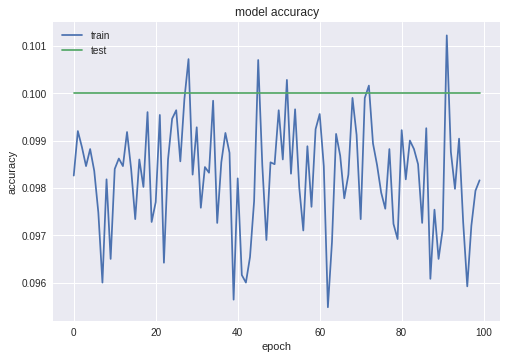

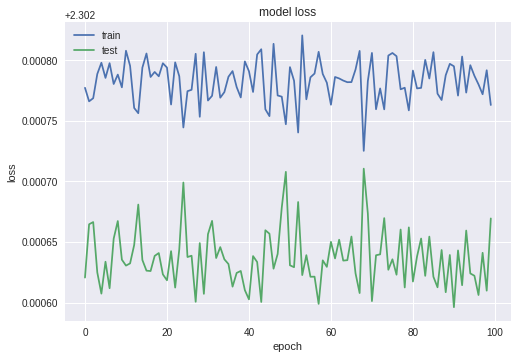

In [53]:
# summarize history for accuracy
plt.plot(fitted_model10.history['acc'])
plt.plot(fitted_model10.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitted_model10.history['loss'])
plt.plot(fitted_model10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()